# PCA

### = Read In CSV...

In [8]:
import pandas as pd

df = pd.read_csv("sysco.csv")

df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### = Reminder: Scale and Remove Outliers...
- Just a reminder...
- The data has been scaled to a more normal distribution using the log function.
- The data has had necessary outliers removed.

### = Principal Component Analysis (PCA)...
- [PCA Tranformation Interactive Demo](http://setosa.io/ev/principal-component-analysis/)
- PCA can help us draw conclusions about the underlying structure in a dataset. 
- It **rotates the axis** of the original dimensions in a way that maximizes the variance .
- It will also **report variance within the data** is explained by each dimension alone. (explained through variance ratio)
- It can then compounds the linear combinations it finds into a new dimension. This **new component (dimension)** can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4596,-0.9765,-0.1212,-0.0615,-0.1524,0.0071,-0.0681
Dimension 2,0.4052,-0.1106,0.5158,0.7646,-0.0187,0.3654,0.0571
Dimension 3,0.0700,-0.1786,0.5099,-0.2758,0.7142,-0.2044,0.2832
Dimension 4,0.0440,-0.0419,-0.6456,0.3755,0.6463,0.1494,-0.0204
Dimension 5,0.0150,0.0160,0.2032,-0.1603,0.2202,0.2079,-0.9171
Dimension 6,0.0061,-0.0158,0.0335,0.4109,-0.0133,-0.8713,-0.2654


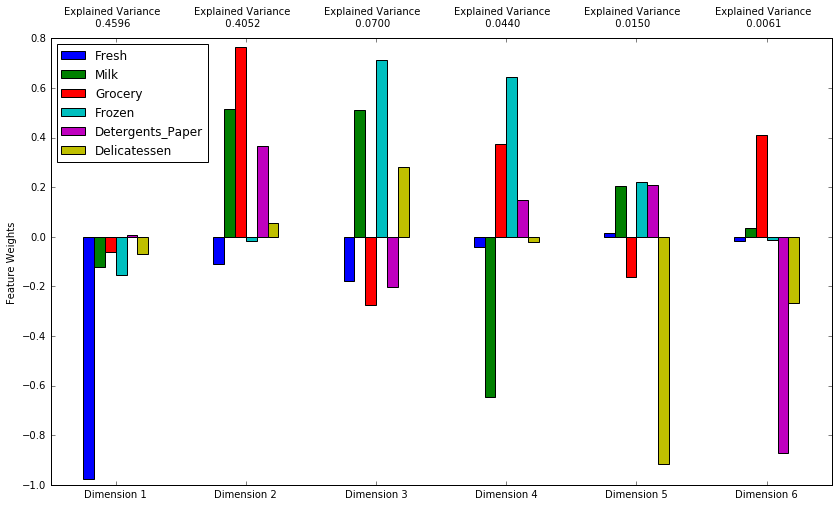

In [9]:
%matplotlib inline

from sklearn.decomposition import PCA
import renders as rs

# Fit a PCA classifier with the same number of dimensions as features
pca = PCA(n_components=6)
pca = pca.fit(df)

# Generate PCA results plot
pca_results = rs.pca_results(df, pca)
pca_results

### = My Interpretation of Results...
- Rows: PCA dimensions that express a percent of data's overall variability.
- Columns: Dimension specific category correlation between the "variation of the entire category before PCA as calculated by range" and the "variation of the specific dimensions category range"

### New PCA Questions
Q1. When interpreting PCA, should I think of a specific dimension's "Explained Variance" (row) as something that weights the correlation to each product? Like is “fresh” in dimension 1 way more important that "Fresh" in dimension 3 because the explained variance is very different?

Q2. If I tood the range for each feature, and added all 6 ranges together would I get "overall variability? Assuming that is true, is it the case that now each dimension now hold a different portion of that overall variability and that is what the "Explained Variance" means?

Q3. Because D3's 'Frozen' category returned the highest value overall (0.7142) does that mean if the company got a new customer and they bought only 100 dollars of "frozen" and nothing else, that 73% of the impact that number had on variance would be explained by D3's "Explained Variance"?



### Previous Instructor Comments
- The PCA dimensions express variation (row) in customer spending and are correlated (column)to the original category data
- A positive weight in a category (correlation column) means the the value of that dimension increases as a customer's spending in that category increases (and a negative weight means the component decreases as a customer's spending increases). The size of the weight indicates the relative size of the increase or decrease.
- For example, the first component shows that we have a lot of variance in customers who purchase Milk, Grocery and Detergents_Paper -- some purchase a lot while others purchase very little.
- A principal component with feature weights that have opposite directions can reveal how customers buy more in one category while they buy less in the other category (and, vice versa) — a customer that has a large positive value for a component with opposite weights buys a lot of the positive-weighted feature but not much of the negative-weighted feature. A customer that has a large negative value in the dimension buys in the opposite proportions.


#### + Guessing at Dimensions...
- It's very hard to know how many dimensions to use. 

In [3]:
# pca = PCA(n_components=10)
# pca = PCA(n_components=6)
# pca = PCA(n_components=5)
# pca = PCA(n_components=3)
# pca = PCA(n_components=2)

#### + Dominate Dimensions (Variance)...
- Most of the variance in this data set is explained by the first two principal components.
- Note that you can print the **proportion of variance** explained by each component as follows:

In [4]:
import numpy as np

print(pca.explained_variance_/np.sum(pca.explained_variance_))

[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


#### + Dominate Features (Correlations)...
-  In addition, please make sure to list the dominant features in each of the first four principal components.
- Remember, the dominant features in a given component are those associated to the scalar value of highest absolute value. 
  - D1: Fresh (-0.9765)
  - D2: Grocery (0.7646)
  - D3: Frozen (0.7142)
  - D4: Frozen (0.6463)

#### + Instructor Example...
- "The first principal component is made up of large positive weights in Detergents_Paper, and lesser but still sizeable positive weights on Grocery and Milk. It also correlates with a decrease in Fresh and Frozen. This might represent spending in household staples products that are purchased together."

### = Explain What the Principal Components Measure...
- Based on the dominant features, make sure to provide an idea of what each of the first four principal components measure.
- A principal component with dominant features that differ in their sign serves to identify customers that purchase a lot of the first category but little of the second as well as customers that buy a lot of the second category but little of the first one
  - D1: The first principal component explains much of the overall variance in our data set. In addition it shows a strong dominant negative feature of “Fresh” which means it found a set of customers who buy everything else but skip the “Fresh” category.
  - D2: The second dimension has “Grocery” as a dominate feature and shows us that customers who buy lots of “Groceries” also tend to buy lots of “Milk”. 
  - D3: As opposed to D2, D3 is composed of customers who buy lots of “Frozen” and “Milk”. This dimension show little overall variance however when compared to D1 and D2. 
  - D4: This dimension show an extreme differences between “Frozen” and “Milk”, “Frozen” being the dominate feature in the positive direction and “Milk” being a near dominate feature in negative direction. This tells us that the 4th dimension found customers that who buy lots of “Frozen” but buy very little “Milk”.  

In [5]:
# Fit a PCA classifier with 2 dimensions
pca_reduce = PCA(n_components=2)
pca_reduce = pca.fit(df)

In [7]:
# Produce a scatter matrix for pca reduced data
pd.scatter_matrix(pca_reduce);

AttributeError: 'PCA' object has no attribute '_get_numeric_data'

Q1. I am unsure how to interpret the mean of segment 0 component. They are all negatives? How can it be that this segment of customers spends money on a product and every category is negatively affected. It seems to me like the customer must make one (dollar value) feature go up, just by virtue of buying something.


Q2. Why is "True Centers" not the mean already? We are looking at data that has already been through 100 iterations of balancing? Also I know the mean is not from the two segments so what is it averaging?


Q3. I really don't understand what compounded PCA scores mean about the customers buying habits. Is a segment in this case a specific group of customers I could find from the original data then average their buying habits? Or if not average some other central tendency?


Q4. How can these new PCA dimensions (segments) represent patterns that cross features when they are representations of variance, variance seems to me like opposite of a usable pattern to me.
Note I feel like it's my job to try and answer some these questions without asking you but for reference I want you to know I really have tried. I just keep coming back to blogs that talk about the PCA process, or concept but few examples of how to interpret specific data in a way that seems to translate back to this project.


Q5. For example Segment 0 has a very high return for fresh "8698.0", higher than anything else in the row. Right now I think this means all of the data from that row combine makes for some kind of "probability distribution" type thing. So that if a customer from this segment placed a new order it would be more likely that he bought fresh, and least likely to buy Delicatessen.
If that is true I don't know how to do that math to tell a future employee how a 100 dollar purchase would break down.
Also if that is true why does the over sum of the row not balance out to zero? Does anything we can calculate balance out to zero after the dimensions are squished together?

Q1. Remember we are now dealing with pca-reduced data and not monetary spending amounts.

Q2. We need to re-create true_centers to reverse the procedures we took on the original data, namely log-transforming and pca-reducing.

Q3. I'm not 100% sure what you're asking, but I think you're wondering what the segments represent. They are ways to group our customers together based on maximizing the variation in how they spend. The pca values are how we do that, after transforming the original spending data with the category weights in each of the first 2 pca dimensions.

Q4. Not quite sure of this question either, but high variance in our data is exactly what we would want to distinguish our customers. For example, if we had low variance in customer spending, they would all essentially look the same. How would we distinguish them?

Q5. The value 8698 corresponds to a monetary spending amount. It is the re-created spending amount of a hypothetical "true center" or "average" customer of each segment. If our monetary units were US dollars, you could write this as $8698.